In [1]:
import pandas as pd

# Projekt: Toronto Bike Sharing

Bike Share Toronto (https://bikesharetoronto.com/) ist ein städtisches System mit ~630 Stationen und ~7000 Rädern
(https://en.wikipedia.org/wiki/Bike_Share_Toronto).

Für jede Reise werden Daten (z.B. von wo nach wo, wie lange dauerte die Fahrt) gesammelt, die online verfügbar sind (https://open.toronto.ca/dataset/bike-share-toronto-ridership-data/).

Die Datenfelder sind
* Trip ID [int]
* Trip Duration [s, int]
* Trip Start Station ID [int]
* Trip Start time [timestamp]
* Trip Start Station Name [string]
* Trip End Station ID [int]
* Trip End Time [timestamp]
* Trip End Station Name [string]
* Bike ID [int]
* User type [string, eigentlich boolean 0/1 (member/casual)]

Mit diesen Daten wollen wir einige Analysen betreiben -- ja wir spielen :)
Als beispielhafte Aufgabe wollen wir z.B. für jede Station vorhersagen, wie viele Räder dort für einen gegebenen Tag ausgeliehen werden.

Nach dem Installieren des Packets (siehe Setup.md)
Das Herunterladen und Bereinigen der Daten ist am Einfachsten über das Skript aus dem "entry_points" Verzeichnis:

``` $ poetry install ```

``` (bike-share-py3.10) $ python entry_points/load_data.py ```

Als Warnung: Die tägliche Arbeit eines Data Scientist besteht zu 80% daraus, Daten zu bereinigen und vielleicht zu 20% daraus statistische Modelle zu bauen und zu trainieren.

# Lineare Regression

Bei vielen Analysen wollen wir eine Zahl $y$, gegeben einige Eingabeparameter $x$, vorhersagen -- diese Problemklasse nennt man "Regression".
Ein Beispiel wäre, dass wir den Preis eines Hauses ($y$) prognostizieren wollen, gegeben einige Parameter ($x$) des Hauses (Anzahl Zimmer, Größe in $m²$, Alter, ...).

Wir wollen also die Ausgaben einer unbekannte Funktion $f : \mathbb{R}^n \to \mathbb{R}$ schätzen.
Genauer, wir haben $N$ Beispiele $(x_i, f(x_i)) : i=0,..,N$ gegeben und wollen nun $f(x)$ für einige neue Punkte $x$ prognostizieren.

Beispiel:

In [4]:
df = pd.read_csv("../data/Howell1.csv", sep=";")

In [7]:
df.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


<AxesSubplot: xlabel='age', ylabel='height'>

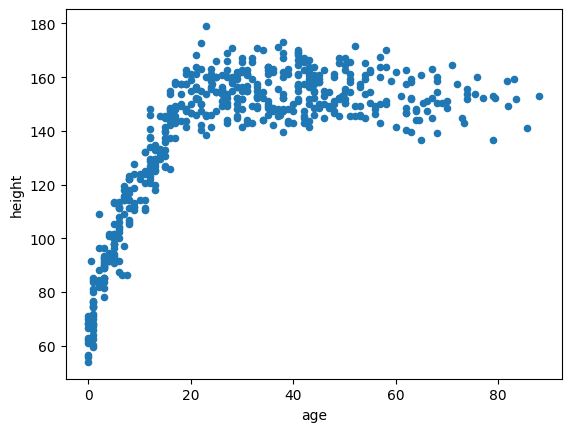

In [10]:
df.plot.scatter(x="age", y="height")

In diesem Beispiel besteht $x$ nur aus einer Ausprägung: "age", im Allgemeinen ist $x$ aber ein Vektor $(x_1, ..., x_n)$

Bei *linerarer* Regression, nehmen wir als Ansatz/Modell eine lineare Funktion für $f$ an. In unserem Beispiel also $y = a\cdot x + b$.
Die beiden Koeffizienten $a$ und $b$ sind noch unbestimmt und sind die freien Parameter unseres Modells. Wir bestimmen $a$ und $b$ so, dass unsere Daten "gut" zu dem Modell passen.
Weil wir (viel) mehr Datenpunkte als Parameter haben wird der Zusammenhang $y = a\cdot x + b$ niemals *exakt* erfüllt sein (und das wäre sogar nichtmal gut!), wir wählen stattdessen $a$ und $b$ so, dass die *mittlere quadratische Abweichung* von $f$ und den Daten minimiert wird.

In anderen Worten, wir wählen $a,b$ so, dass im Mittel über alle Datenpunkte $(x,y)$, $(a\cdot x + b - y)^2$ möglichst klein wird.
(die Abweichung vom Modell zur Realität, wobei wir Abweichungen quadratisch werten, d.h. größere Abweichungen werden stärker bestraft.)

Nochmal genauer formuliert: Gegeben n Paare von Datenpunkten $(x^{(1)}, y^{(1)}), ..., (x^{(n)}, y^{(n)})$
suchen wir $a,b$ so dass der Ausdruck

$\frac{1}{n} \sum_{i=1}^n (a\cdot x^{(i)} + b - y^{(i)})^2$

minimal wird.

$\frac{1}{n} \sum_{i=1}^n |A \cdot x - y|_2^2 $

# Evaluation

# Aufgabe:
1. Mache Dich mit den Daten vertraut (download, Einlesen)
2. Hauptaufgabe: Für jeden Tag und Station voraussagen, wie viele Fahrräder dort ausgeliehen werden.
3. Nebenaufgaben (erstmal ein Modell für Frage 2 Bauen und evaluieren!):
 * Was könnten andere Maßzahlen als "tägliche Anzahl Ausleihvorgänge" sein, die vielleicht hilfreich(er) sind?
 * Welchen Einfluss hatte Covid-19 auf das Ausleihverhalten?
 * Graphische Darstellung auf der Karte von Toronto

# Links

## Nützliche Dokumentationen
https://pandas.pydata.org/docs/user_guide/indexing.html

https://pandas.pydata.org/docs/user_guide/merging.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html

## weitere Links
https://bikesharetoronto.com/faq/

https://www.kaggle.com/code/yclaudel/see-the-flow-of-bikes/notebook
(da wird auch beschrieben, wie man an die Stations-Daten https://tor.publicbikesystem.net/ube/gbfs/v1/en/station_information kommt)

https://tellingstorieswithdata.com/inputs/pdfs/paper_one-2022-hudson_yuen.pdf

https://toronto.weatherstats.ca/download.html (3 Jahre = 1095 Tage)

https://opendata.stackexchange.com/questions/7793/age-weight-and-height-dataset (Referenz auf https://github.com/rmcelreath/rethinking/blob/master/data/Howell1.csv und https://github.com/rmcelreath/rethinking/blob/master/data/Howell2.csv)
